In [24]:
import re
import pandas as pd

def extract_values_from_file(file_path,cpus):
    time = re.compile(r'That took (\S+) seconds')

    cpu_list = []
    time_list = []

    for cpu in cpus:
        with open(f"../result/thread_1_task_{cpu}.out", 'r') as file:
            content = file.read()

            time_matches = time.findall(content)

            for times in time_matches:
                cpu_list.append(cpu)
                time_list.append(float(times))

    data = {'cpus': cpu_list, 'runtime': time_list}
    #df_new = pd.DataFrame(data)
    #df.oncat([df,df_new])
    return cpu_list, time_list, data



   cpus     runtime
0     1  134.058007
1     2   66.225356
2     4   33.025642
3     8   16.495332
4    16    8.607952
5    32    6.690075


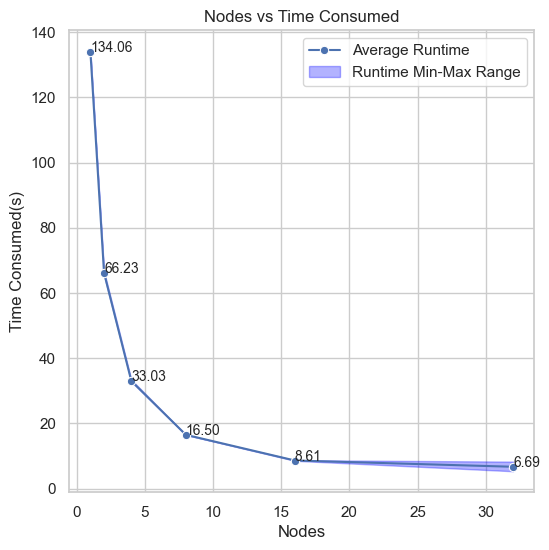

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.DataFrame()
_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1,2,4,8,16,32])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='runtime', data=df_avg, label='Average Runtime', marker='o')
for i in range(len(df_avg['runtime'])):
        plt.gca().text(df_avg['cpus'][i], df_avg['runtime'][i], str("{:.2f}".format(df_avg['runtime'][i])),fontsize = 10)
plt.fill_between(df_avg['cpus'], df_min['runtime'], df_max['runtime'], color='blue', alpha=0.3, label='Runtime Min-Max Range')


plt.xlabel('Nodes')
plt.ylabel('Time Consumed(s)')
plt.title('Nodes vs Time Consumed')
plt.legend()
plt.grid(True)

plt.savefig("runtime.svg")
plt.show()


   cpus     runtime
0     1  134.058007
1     2   66.225356
2     4   33.025642
3     8   16.495332
4    16    8.607952
5    32    6.690075
   cpus     runtime   speed_up ideal_speed_up
0     1  134.117037   0.999560              1
1     1  133.942769   1.000860              1
2     1  133.971786   1.000644              1
3     1  134.007333   1.000378              1
4     1  133.982927   1.000560              1
5     1  134.176685   0.999116              1
6     1  134.133900   0.999434              1
7     1  134.131617   0.999451              1
8     2   65.384273   2.050310              2
9     2   65.483569   2.047201              2
10    2   65.551545   2.045078              2
11    2   66.542302   2.014628              2
12    2   66.088144   2.028473              2
13    2   66.566379   2.013900              2
14    2   66.659454   2.011088              2
15    2   66.708014   2.009624              2
16    2   66.633385   2.011874              2
17    2   66.636499   2.011780  

/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/4279255452.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/4279255452.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Range', alpha=0.3)


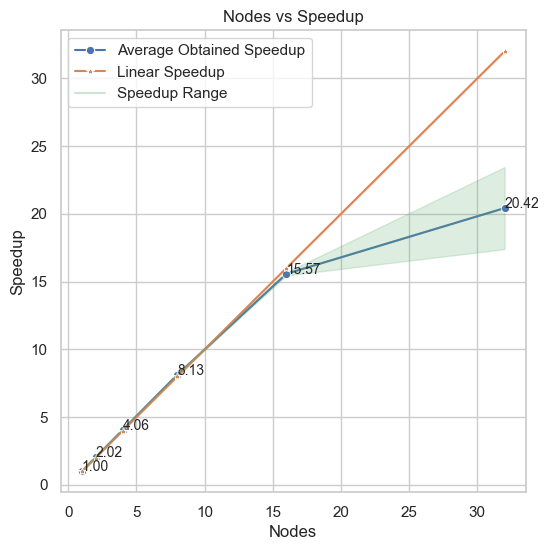

In [38]:
import pandas as pd

_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1,2,4,8,16,32])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

group_size = 10
result_df = pd.DataFrame(columns=df.columns)
first_obtained = 134.058007

for i in range(0, len(df), group_size):
    group_df = df.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['runtime']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']
print(result_df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='speed_up', data=df_all, label='Average Obtained Speedup', marker='o')
sns.lineplot(x='cpus', y='ideal_speed_up', data=result_df, label='Linear Speedup', marker='*')

for i in range(len(df_all['runtime'])):
        plt.gca().text(df_all['cpus'][i], df_all['speed_up'][i], str("{:.2f}".format(df_all['speed_up'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Range', alpha=0.3)



plt.xlabel('Nodes')
plt.ylabel('Speedup')
plt.title('Nodes vs Speedup')
plt.legend()
plt.grid(True)

plt.savefig("speedup.svg")
plt.show()

/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/1558976173.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/1558976173.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)


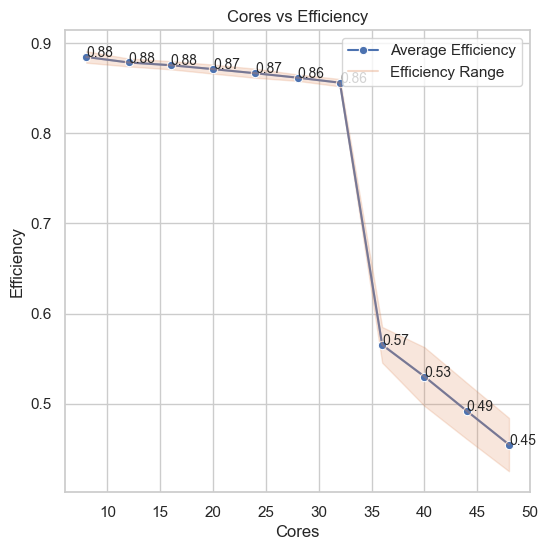

In [143]:
import pandas as pd

_, _, _, df_all = extract_values_from_file('../output/pi_thread_thin_48.out')
df_all = df_all.iloc[1:] # ignore the repeated row


group_size = 13
result_df = pd.DataFrame(columns=df_all.columns)
first_obtained = 36.537154

for i in range(0, len(df_all), group_size):
    group_df = df_all.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['obtained']
    group_df['effiency'] = group_df['speed_up'] / group_df['cpus']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='effiency', data=df_all, label='Average Efficiency', marker='o')
for i in range(len(df_all['obtained'])):
        plt.gca().text(df_all['cpus'][i], df_all['effiency'][i], str("{:.2f}".format(df_all['effiency'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)



plt.xlabel('Cores')
plt.ylabel('Efficiency')
plt.title('Cores vs Efficiency')
plt.legend()
plt.grid(True)
plt.savefig("efficiency.svg")
plt.show()

In [ ]:
import pandas as pd

_, _, _, df_all = extract_values_from_file('../output/pi_thread_thin_48.out')
df_all = df_all.iloc[1:] # ignore the repeated row


group_size = 13
result_df = pd.DataFrame(columns=df_all.columns)
first_obtained = 36.537154

for i in range(0, len(df_all), group_size):
    group_df = df_all.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['obtained']
    group_df['effiency'] = group_df['speed_up'] / group_df['cpus']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='effiency', data=df_all, label='Average Efficiency', marker='o')
for i in range(len(df_all['obtained'])):
        plt.gca().text(df_all['cpus'][i], df_all['effiency'][i], str("{:.2f}".format(df_all['effiency'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)



plt.xlabel('Cores')
plt.ylabel('Efficiency')
plt.title('Cores vs Efficiency')
plt.legend()
plt.grid(True)
plt.savefig("efficiency.svg")
plt.show()